VECTOR AUTO REGRESSION MODEL (VAR):

IN VAR, the value of the time series variable depends on itself as in previous models, however unlike previous models, the time series is dependent on lagged values of other variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Step 1: Reading the Data

In [2]:
df = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/M2SLMoneyStock.csv", index_col= 0, parse_dates= True)

In [3]:
df1 = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/PCEPersonalSpending.csv", index_col= 0, parse_dates= True)

In [4]:
df = df.join(df1)
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [5]:
df.shape

(252, 2)

In [6]:
df.dropna().shape

(252, 2)

In [7]:
df.index.freq = "MS"

Step 2: Plot the Data

[Text(0.5, 1.0, 'MOney Stock vs Personal Consumption'),
 Text(0, 0.5, 'Billions Of Dollars')]

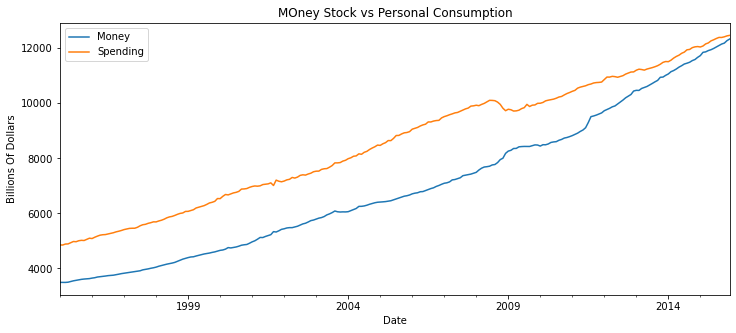

In [8]:
title = "MOney Stock vs Personal Consumption"
ylabel = "Billions Of Dollars"
ax = df.plot(figsize = (12, 5), legend = True)
ax.set(title = title, ylabel = ylabel)

Step 3: Checking for stationarity using adfuller test

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adf_result = adfuller(df["Money"], autolag= "AIC")
adf_result

(4.239022425670641,
 1.0,
 4,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 2219.917877142354)

Since p-value = 1 >> 0.05; Null hypothesis is accepted; Data is not stationary

In [11]:
adf_result = adfuller(df["Spending"], autolag= "AIC")
adf_result

(0.14979608598625338,
 0.9693009944428311,
 3,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2339.735574840993)

Since p-value = 0.969 >> 0.05; Null hypothesis is accepted; Data is not stationary

Neither of the two variable is stationary; hence we will take the first order of the entire dataframe and re run the adfuller test

In [12]:
df_transformed_1 = df.diff().dropna()

In [13]:
adf_result = adfuller(df_transformed_1["Money"], autolag= "AIC")
adf_result

(-2.0574040497379404,
 0.261983797851124,
 15,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2222.9483460694405)

In [14]:
adf_result = adfuller(df_transformed_1["Spending"], autolag= "AIC")
adf_result

(-7.226973930850652,
 2.0410272592129196e-10,
 2,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2328.23145843905)

Money is not yet stationary, hence we apply second order differencing on the entire dataset

In [15]:
df_transformed_2 = df_transformed_1.diff().dropna()

In [16]:
adf_result = adfuller(df_transformed_2["Money"], autolag= "AIC")
adf_result

(-7.077470794343014,
 4.760674931296131e-10,
 14,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2217.097202826827)

In [17]:
adf_result = adfuller(df_transformed_2["Spending"], autolag= "AIC")
adf_result

(-8.760145426337722,
 2.6878999679871058e-14,
 8,
 241,
 {'1%': -3.4577787098622674,
  '5%': -2.873608704758507,
  '10%': -2.573201765981991},
 2339.3283710766104)

Now since both the money and spending the stationary; we can apply the VAR Model

Step 4: Train-test split

In [18]:
df_transformed_2.shape

(250, 2)

In [19]:
obs = 12
train = df_transformed_2[:-obs]
test = df_transformed_2[-obs:]

In [20]:
train.shape

(238, 2)

Step 5: Determining the order

We will use p-values from 1 - 7, and choose the one with the lowest AIC AND BIC values

In [21]:
from statsmodels.tsa.api import VAR

In [22]:
for i in range (1, 8):
    model = VAR(train)
    result = model.fit(i)
    print("Order = {}".format(i))
    print("AIC: {}".format(result.aic))
    print("BIC: {}".format(result.bic))

Order = 1
AIC: 14.178610495220896
BIC: 14.266409486135709
Order = 2
AIC: 13.955189367163705
BIC: 14.101961901274958
Order = 3
AIC: 13.849518291541038
BIC: 14.055621258341116
Order = 4
AIC: 13.827950574458281
BIC: 14.093744506408875
Order = 5
AIC: 13.78730034460964
BIC: 14.113149468980652
Order = 6
AIC: 13.799076756885807
BIC: 14.185349048538066
Order = 7
AIC: 13.797638727913972
BIC: 14.244705963046671


The VAR(5) seems to give the best scores

In [23]:
model.endog_names

['Money', 'Spending']

Step 6: Fitting the model

In [24]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Jun, 2022
Time:                     17:01:46
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

Step 7: Predicting the values of the test range

In [25]:
lag_order = results.k_ar
lag_order

5

In [26]:
z = results.forecast(train.values[-lag_order:], steps= 12)
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [27]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


In [28]:
df_forecast = pd.DataFrame(z, columns= ["Money_2D", "Spending_2D"], index= test.index)
df_forecast

,Money_2D,Spending_2D
Date,,
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147


In [29]:
df_forecast.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', freq='MS')

INVERTING THE TRANSFORMATION AS THE FORECAST AS WELL AS THE TEST VALUE IS 2ND ORDER DIFFERENCED

In [30]:
df_forecast["Money_1D"] = (df['Money'].iloc[-obs-1] - df['Money'].iloc[-obs-2]) + df_forecast["Money_2D"].cumsum()
df_forecast["Money_forecast"] = df['Money'].iloc[-obs-1] + df_forecast["Money_1D"].cumsum()

In [31]:
df_forecast["Spending_1D"] = (df['Spending'].iloc[-obs-1] - df['Spending'].iloc[-obs-2]) + df_forecast["Spending_2D"].cumsum()
df_forecast["Spending_forecast"] = df['Spending'].iloc[-obs-1] + df_forecast["Spending_1D"].cumsum()

In [32]:
df_forecast

,Money_2D,Spending_2D,Money_1D,Money_forecast,Spending_1D,Spending_forecast
Date,,,,,,
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549
2015-06-01,1.559393,0.387639,61.238678,12024.557062,32.038284,12270.446833
2015-07-01,-0.998410,3.883680,60.240268,12084.797331,35.921964,12306.368797
2015-08-01,0.364510,-2.356101,60.604779,12145.402109,33.565863,12339.934659
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261,32.341716,12372.276375


Step8: Plot the results

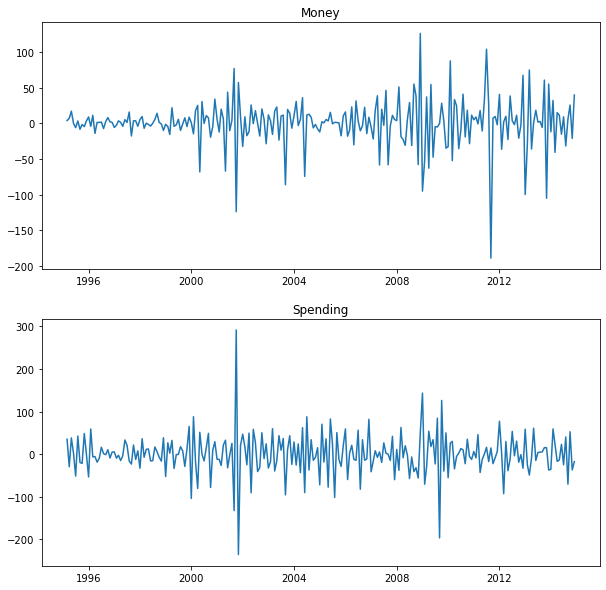

In [34]:
results.plot();

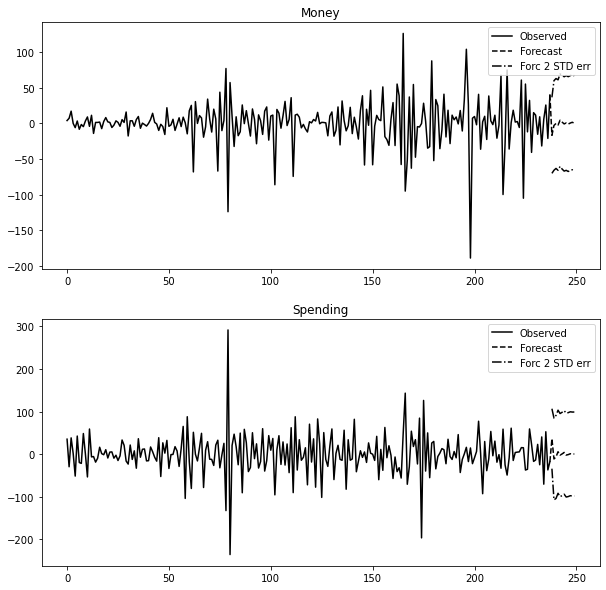

In [36]:
results.plot_forecast(12);

Above are the inbuilt functions of VAR. Plotting against test values

<AxesSubplot:xlabel='Date'>

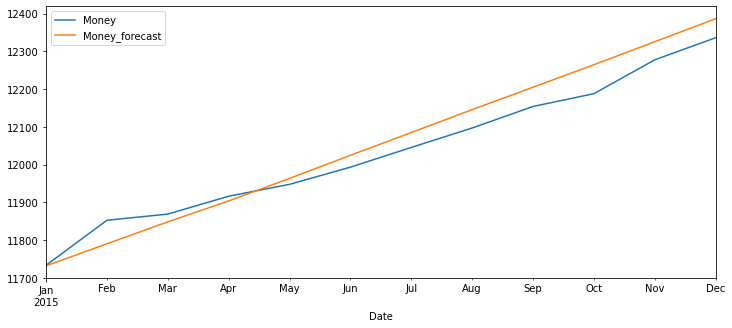

In [40]:
df["Money"][-obs:].plot(figsize = (12, 5), legend = True)
df_forecast["Money_forecast"].plot( legend = True)

<AxesSubplot:xlabel='Date'>

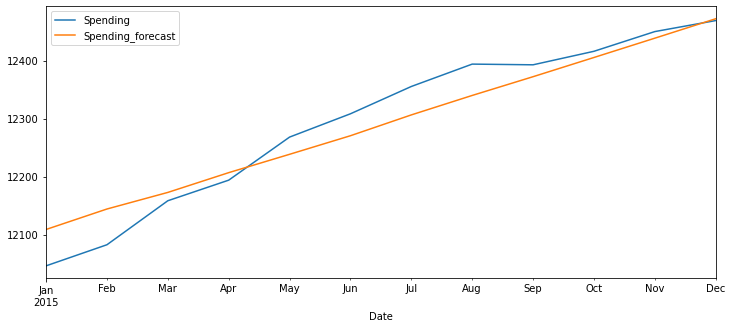

In [41]:
df["Spending"][-obs:].plot(figsize = (12, 5), legend = True)
df_forecast["Spending_forecast"].plot( legend = True)

Step 9: Evaluate the model

In [42]:
from statsmodels.tools.eval_measures import rmse, mse

In [53]:
metrics = [rmse, mse]
column = ["Money", "Spending"]
for col in column:
    for metric in metrics:
        error = metric(df[col][-obs:], df_forecast[col + "_forecast"])
        print("{} VAR(5) {}: {}".format(col, str(metric).split(" ")[1], round(error, 3)))

Money VAR(5) rmse: 43.71
Money VAR(5) mse: 1910.608
Spending VAR(5) rmse: 37.001
Spending VAR(5) mse: 1369.087
